In [1]:
import pysam
import numpy as np

# take out only base pairs

import re
import pandas as pd
import matplotlib as plt

In [2]:
samfile = pysam.AlignmentFile("sample_CD003_tcf4.sorted.bam", "rb")


In [3]:
iter = samfile.fetch('18', 52895202, 52895362)

x_list = []
for x in iter:
    #print (str(x))
    x_list.append(x)

In [4]:
# take out only base pairs
def find_base(str_line):
    
    m = re.search('\t(.+?)\tarray', str_line)


    if m:
        found = m.group(1)


    else:
        print('Could not find')

    # found: 1234


    s = found
    first_a_base = (s.find('A'))
    first_t_base = (s.find('T'))
    first_c_base = (s.find('C'))
    first_g_base = (s.find('G'))

    four_nums = [first_c_base, first_t_base, first_a_base, first_g_base]
    four_np = np.array(four_nums)
    min_ind = np.argmin(four_np)
    start_ind = four_nums[min_ind]


    bases = found[start_ind:]


    #print(bases)
    len(bases)
    return bases




In [5]:
def base_to_num(base_line):  
    
    bases_in_num = []

    for base in base_line:

        if base == 'A':
            base_num = 1
        elif base == 'T':
            base_num = 2
        elif base == 'C':
            base_num = 3
        elif base == 'G':
            base_num = 4
        else:
            base_num = 0

        bases_in_num.append(base_num)
    return bases_in_num


In [7]:
base_mat = np.zeros((44,151))

In [8]:
for i in range(len(x_list)):
    base_input = find_base(str(x_list[i]))
    base_mat[i,:] = (base_to_num(base_input))

In [9]:
a = base_mat[0,:]
b = base_mat[1,:]

In [10]:
X = b
Y = a


same_score_before = []
for i in range(151):

    X = np.insert(X, 0, 6., axis=0)
    Y = np. append(Y, 0)
    #print(np.sum(X == Y))
    same_score_before.append(np.sum(X == Y))
    




49
42
56
42
44
32
41
39
30
35
46
44
41
46
54
51
54
58
132
57
53
48
48
41
37
40
43
31
28
36
35
30
35
36
45
35
41
41
38
41
35
43
34
29
36
32
29
27
32
28
31
32
34
30
27
29
36
34
30
25
27
22
25
26
33
27
21
20
23
19
18
20
27
23
21
15
23
20
22
19
21
19
22
18
23
21
19
20
18
18
14
13
13
15
14
17
15
14
12
10
9
11
13
13
11
12
14
12
13
19
16
15
17
11
10
10
10
8
3
8
7
4
6
8
8
7
7
11
10
6
8
7
8
6
3
5
4
2
2
1
1
0
1
2
1
1
0
1
1
1
0


In [12]:
X = a
Y = b


same_score = []
for i in range(151):

    X = np.insert(X, 0, 6., axis=0)
    Y = np. append(Y, 0)
    print(np.sum(X == Y))
    same_score.append(np.sum(X == Y))
    




53
57
52
52
47
44
47
43
38
35
44
36
43
48
43
40
40
43
46
42
42
41
38
37
40
40
43
38
33
31
31
33
28
34
34
32
31
27
33
35
35
34
28
32
32
31
33
39
35
35
35
35
29
22
25
30
25
25
28
30
28
24
23
27
22
23
21
26
23
24
25
36
25
26
28
20
17
21
19
18
12
17
20
13
15
20
17
18
14
22
23
19
21
30
20
15
12
13
10
10
11
13
10
10
9
14
11
12
14
15
14
16
10
7
17
12
11
8
12
10
7
6
6
7
4
9
9
8
6
6
11
3
7
6
6
5
3
5
4
2
1
3
3
2
2
2
1
1
0
0
0


/Users/minsuyoo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

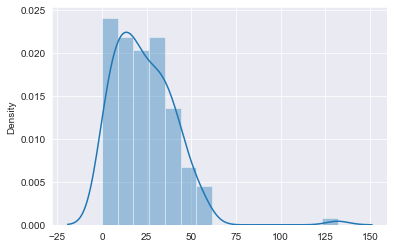

In [14]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(same_score_before)

/Users/minsuyoo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


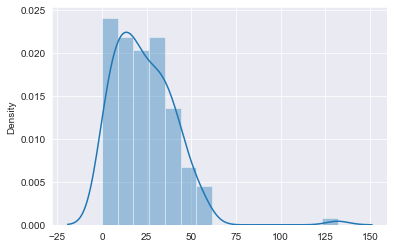

In [16]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(same_score_before)

ss = np.array(same_score_before)

In [17]:
np.max(ss)

132

In [18]:
np.argmax(ss)

18

In [19]:
X = b
Y = a


same_score_before = []
for i in range(19):

    X = np.insert(X, 0, 6., axis=0)
    Y = np. append(Y, 0)
    print(np.sum(X == Y))
    same_score_before.append(np.sum(X == Y))
    




49
42
56
42
44
32
41
39
30
35
46
44
41
46
54
51
54
58
132


In [20]:
aaa = np.vstack((X, Y))

In [21]:
an_array_dt = pd.DataFrame(aaa.T)

In [22]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [23]:
an_array_dt

,0,1
0,6.0,1.0
1,6.0,2.0
2,6.0,1.0
3,6.0,1.0
4,6.0,2.0
5,6.0,1.0
6,6.0,3.0
7,6.0,1.0
8,6.0,4.0
9,6.0,3.0


/Users/minsuyoo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

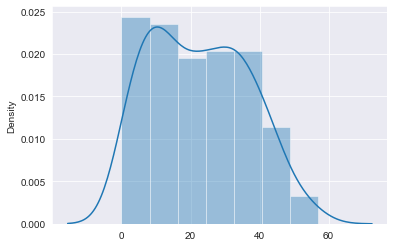

In [13]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(same_score)